# Plotting a vector

This notebook provides an example of how to plot velocities. We will be using the winds for this.

### Import packages and define fucntions for calculations

In [1]:
'''Import packages for loading data, analysing, and plotting'''

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
import cartopy
import cartopy.crs as ccrs
import matplotlib
from netCDF4 import Dataset
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy.ma as ma


import os
import matplotlib.colors as colors

import scipy
from cartopy.util import add_cyclic_point
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


In [2]:
file1='/data/CMIP/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp370/r1i1p1f2/Amon/va/gn/v20190510/va_Amon_UKESM1-0-LL_ssp370_r1i1p1f2_gn_201501-204912.nc'
file2='/data/CMIP/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp370/r1i1p1f2/Amon/ua/gn/v20190510/ua_Amon_UKESM1-0-LL_ssp370_r1i1p1f2_gn_201501-204912.nc'
d1=Dataset(file1)
va=d1.variables['va'][:]
d2=Dataset(file2)
ua=d2.variables['ua'][:]
lat=d2.variables['lat'][:]
lon=d2.variables['lon'][:]-180 #change [0,360] to [-180,180]
plev=d2.variables['plev'][:] #pressure in Pa, from surface to top


In [3]:
#Identify 2D latitudes and longitudes
lon2d, lat2d = np.meshgrid(lon, lat)

In [4]:
#time-averaged wind speed
va_ave=np.average(va,axis=0)
ua_ave=np.average(ua,axis=0)

In [5]:
# wind stress at chosen pressure level
#surface at 1000mb
va_1000mb=va_ave[0]
ua_1000mb=ua_ave[0]
#at 850mb
va_850mb=va_ave[2]
ua_850mb=ua_ave[2]
#at 500mb
va_500mb=va_ave[5]
ua_500mb=ua_ave[5]
#at 250mb
va_250mb=va_ave[8]
ua_250mb=ua_ave[8]



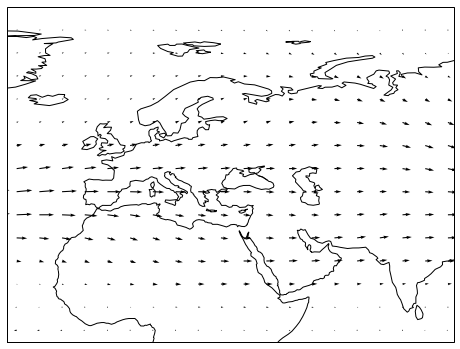

In [6]:
region=[-30, 90, 0, 90] #[lon_min,lon_max,lat_min,lat_max]
projection=ccrs.PlateCarree()
transform=ccrs.PlateCarree()
plt.figure(figsize=(8, 10))
ax = plt.axes(projection=projection)
ax.coastlines()
ax.quiver(lon2d, lat2d, ua_250mb, va_250mb, transform=transform,regrid_shape=30)
ax.set_extent(region, ccrs.PlateCarree())


The surface meridional winds, vas, have slightly different latitudes (because of UKESM1's Arakawa C-grid). 

If you want to look at surface v wind in vas files, you must first alter its' resolution to be that of the v winds. This is done by:

In [ ]:
#solve the lat. grid problem (lat is half grid shifted )
vas_fixed=np.zeros((vas.shape[0],vas.shape[1]-1,vas.shape[2]))
for i in range(vas.shape[1]-1):
    vas_fixed[:,i,:]=(vas[:,i,:]+vas[:,i+1,:])/2

In [ ]:
#Should you want to calculate the average different vertical levels:
va_level=np.average(va_ave[level1:level2],axis=0)